In [1]:
# Importing all the necessary libraries
# Data wrangling and Statistical testing modules
import pandas as pd
import numpy as np
# import statsmodels

# import os

# Data visualization modules
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


# Suppressing warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
pd.options.display.float_format = '{:,.3f}'.format

In [4]:
df_allchannelsalesvol = pd.read_excel('Salesvol-Combined - Copy.xlsx')

In [5]:
salesvol_df = df_allchannelsalesvol.copy(deep=True)

In [6]:
salesvol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236415 entries, 0 to 236414
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Year            236415 non-null  int64         
 1   Month           236415 non-null  int64         
 2   Record Date     236415 non-null  datetime64[ns]
 3   Sku #           204025 non-null  object        
 4   Sku             236415 non-null  object        
 5   Merged Sku      236415 non-null  object        
 6   Launch Date     204025 non-null  float64       
 7   Classification  204025 non-null  object        
 8   Subclass        204025 non-null  object        
 9   Collection      204025 non-null  object        
 10  Channel         236415 non-null  int64         
 11  Volume          236415 non-null  float64       
 12  COGS            204025 non-null  float64       
 13  MSRP            204025 non-null  float64       
 14  Line Edit       204025 non-null  obj

In [7]:
salesvol_df.drop(columns=['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19'], inplace=True)

In [8]:
salesvol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236415 entries, 0 to 236414
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Year            236415 non-null  int64         
 1   Month           236415 non-null  int64         
 2   Record Date     236415 non-null  datetime64[ns]
 3   Sku #           204025 non-null  object        
 4   Sku             236415 non-null  object        
 5   Merged Sku      236415 non-null  object        
 6   Launch Date     204025 non-null  float64       
 7   Classification  204025 non-null  object        
 8   Subclass        204025 non-null  object        
 9   Collection      204025 non-null  object        
 10  Channel         236415 non-null  int64         
 11  Volume          236415 non-null  float64       
 12  COGS            204025 non-null  float64       
 13  MSRP            204025 non-null  float64       
 14  Line Edit       204025 non-null  obj

In [9]:
print(f"Total Revenue: {salesvol_df['Volume'].sum()}")

Total Revenue: 1290733317.437273


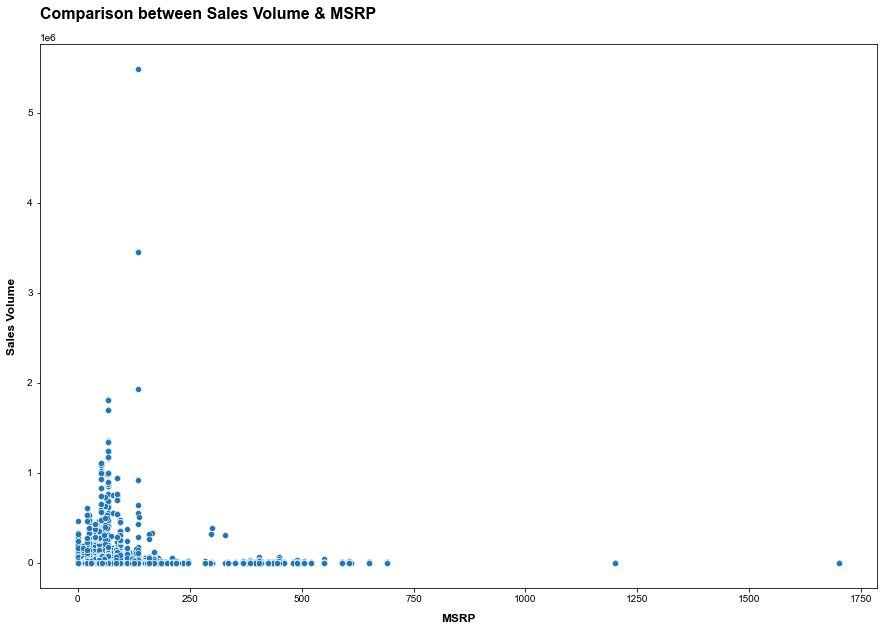

In [10]:
plt.figure(figsize =(15, 10))
sns.scatterplot(data=salesvol_df, x='MSRP', y='Volume')
plt.ylabel('Sales Volume', fontsize = 12, fontweight='bold', labelpad=10)
plt.xlabel('MSRP', fontsize = 12, fontweight='bold', labelpad=10)
plt.title('Comparison between Sales Volume & MSRP', loc='left', fontsize = 16, 
          fontweight='bold', pad= 25)
sns.set_theme(style='white')
sns.set_style("darkgrid")

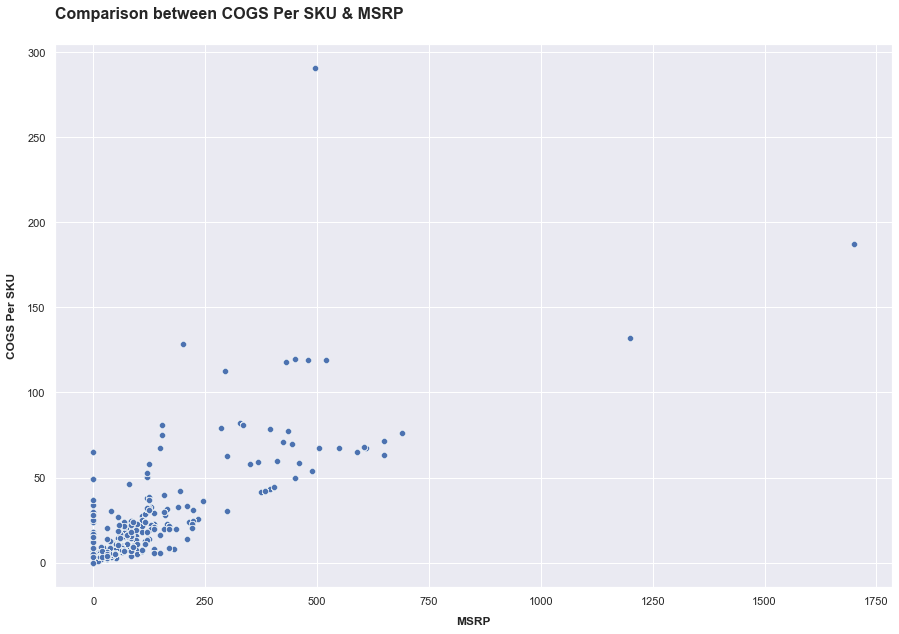

In [11]:
plt.figure(figsize =(15, 10))
sns.scatterplot(data=salesvol_df, x='MSRP', y='COGS')
plt.ylabel('COGS Per SKU', fontsize = 12, fontweight='bold', labelpad=10)
plt.xlabel('MSRP', fontsize = 12, fontweight='bold', labelpad=10)
plt.title('Comparison between COGS Per SKU & MSRP', loc='left', fontsize = 16, 
          fontweight='bold', pad= 25)
sns.set_theme(style='white')
sns.set_style("darkgrid")

In [12]:
salesvol_df.drop(columns='Launch Date', inplace=True)

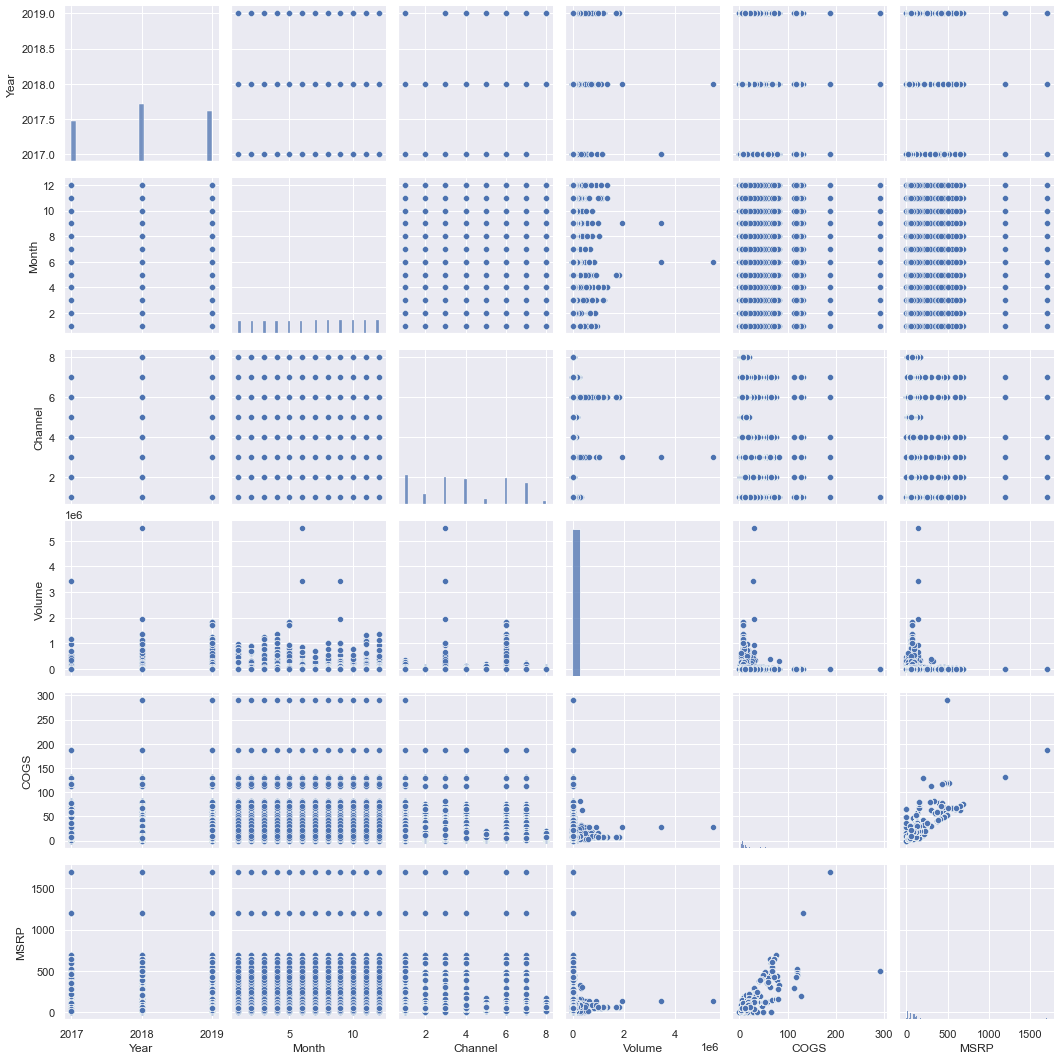

In [13]:
sns.pairplot(salesvol_df)

<AxesSubplot:>

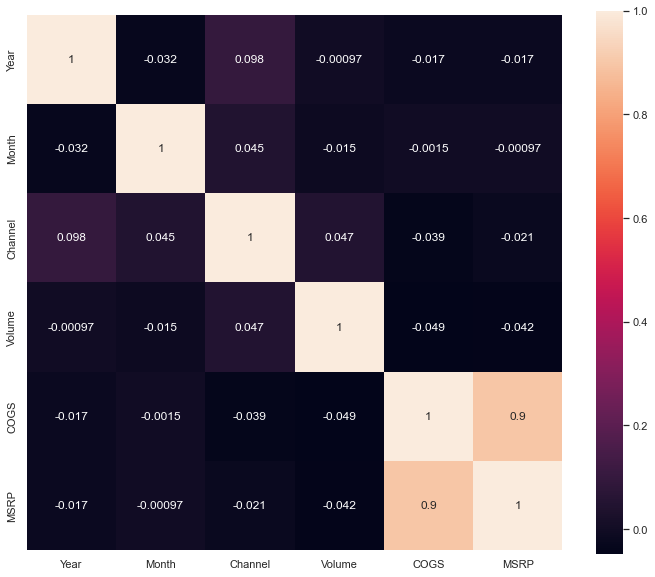

In [14]:
plt.subplots(figsize=(12,10))
sns.heatmap(salesvol_df.corr(), annot=True, square=True)

In [15]:
salesvol_df['Volume'][salesvol_df['MSRP'] == 0].sum()

12061881.809999999

In [16]:
salesvol_df['Volume'][salesvol_df['COGS'] == 0].sum()

2978.04

In [17]:
salesvol_df.drop(salesvol_df['Volume'][salesvol_df['Classification'] == 0].index, inplace=True)

In [18]:
salesvol_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230835 entries, 0 to 236414
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Year            230835 non-null  int64         
 1   Month           230835 non-null  int64         
 2   Record Date     230835 non-null  datetime64[ns]
 3   Sku #           198445 non-null  object        
 4   Sku             230835 non-null  object        
 5   Merged Sku      230835 non-null  object        
 6   Classification  198445 non-null  object        
 7   Subclass        198445 non-null  object        
 8   Collection      198445 non-null  object        
 9   Channel         230835 non-null  int64         
 10  Volume          230835 non-null  float64       
 11  COGS            198445 non-null  float64       
 12  MSRP            198445 non-null  float64       
 13  Line Edit       198445 non-null  object        
 14  Region Name     198445 non-null  obj

In [19]:
salesvol_df['Volume'][salesvol_df['Classification'].isna()].sum()

35166980.42682277

In [22]:
salesvol_df[salesvol_df['Sku'].str.contains('SPF35') & salesvol_df['Sku'].str.contains('Travel')]

,Year,Month,Record Date,Sku #,Sku,Merged Sku,Classification,Subclass,Collection,Channel,Volume,COGS,MSRP,Line Edit,Region Name
